In [ ]:
import pandas as pd
import numpy as np

#Importing  Visualization library
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Model from Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, SCORERS

In [ ]:
df=pd.read_csv("/content/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


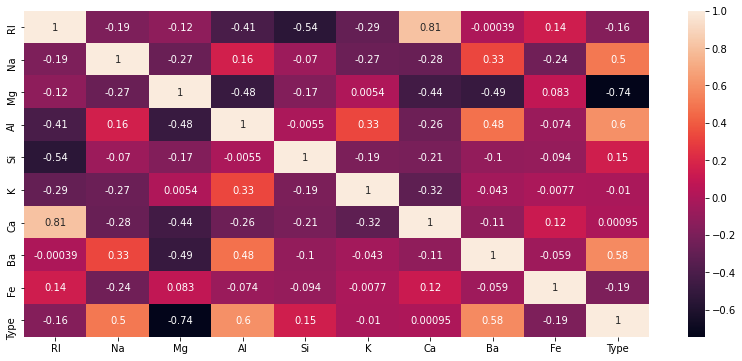

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#feature=df.iloc[:,[2,3,7,8]]
feature=df.drop("Type",axis=1)
feature.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
target=df.iloc[:,[-1]]
target.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [ ]:
knn_model= KNeighborsClassifier(n_neighbors=1)
log_model= LogisticRegression()
dtree_model=DecisionTreeRegressor()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=4)


In [ ]:
knn_model.fit(x_train,y_train)
log_model.fit(x_train,y_train)
dtree_model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print(log_model.score(x_test, y_test))
print(knn_model.score(x_test, y_test))
print(dtree_model.score(x_test, y_test))

0.7209302325581395
0.8604651162790697
0.6548806941431671


In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 20)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.8604651162790697, 0.8372093023255814, 0.7906976744186046, 0.7441860465116279, 0.7674418604651163, 0.7441860465116279, 0.7209302325581395, 0.7209302325581395, 0.7209302325581395, 0.7209302325581395, 0.6976744186046512, 0.7209302325581395, 0.6976744186046512, 0.7441860465116279, 0.7674418604651163, 0.7441860465116279, 0.7441860465116279, 0.7674418604651163, 0.7674418604651163]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th